In [1]:
'''Importing libraries for different functionality'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt

In [2]:
datafile1=pd.read_csv('elcentro_EW.dat',sep=' ')#the east west component of seismic wave
datafile2=pd.read_csv('elcentro_NS.dat',sep=' ')#the north-south component of seismic wave
datafile3=pd.read_csv('elcentro_UP.dat',sep=' ')#the vertical component of seismic wave
print('For data file 1:','\n',datafile1.describe())
print('For data file 2:','\n',datafile2.describe())
print('For data file 3:','\n',datafile3.describe())

For data file 1: 
               time  acceleration
count  2674.000000   2674.000000
mean     26.730000     -0.000218
std      15.441233      0.039617
min       0.000000     -0.182526
25%      13.365000     -0.013358
50%      26.730000     -0.000102
75%      40.095000      0.011115
max      53.460000      0.214137
For data file 2: 
               time  acceleration
count  2688.000000   2688.000000
mean     26.870000      0.000049
std      15.522062      0.046928
min       0.000000     -0.268181
25%      13.435000     -0.012746
50%      26.870000     -0.000306
75%      40.305000      0.010936
max      53.740000      0.348737
For data file 3: 
               time  acceleration
count  2690.000000   2690.000000
mean     26.890000     -0.000049
std      15.533609      0.024105
min       0.000000     -0.210058
25%      13.445000     -0.004665
50%      26.890000     -0.000102
75%      40.335000      0.004589
max      53.780000      0.193743


In [3]:
time=datafile1.iloc[0::,0]#time
accl_EW=datafile1.iloc[0::,1]#acceleration
plt.plot(time,accl_EW)
print(np.size(accl_EW))
accl_EW=list(accl_EW)
accl_EW=np.array(accl_EW)
accl_EW=accl_EW-np.ones(np.size(accl_EW))*np.mean(accl_EW)#detrending the data  
accl_EW=list(accl_EW)
for i in range(26):
    accl_EW.append(0)
print(np.size(accl_EW))

2674
2700


2688
2700


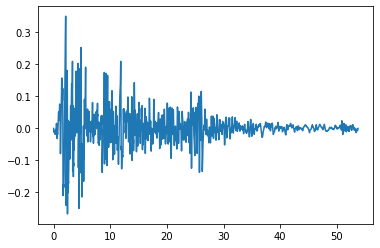

In [4]:
time=datafile2.iloc[0::,0]#time
accl_NS=datafile2.iloc[0::,1]#acceleration
plt.plot(time,accl_NS)
print(np.size(accl_NS))
accl_NS=list(accl_NS)
accl_NS=np.array(accl_NS)
accl_NS=accl_NS-np.ones(np.size(accl_NS))*np.mean(accl_NS)#detrending the data  
accl_NS=list(accl_NS)
for i in range(12):
    accl_NS.append(0)
print(np.size(accl_NS))

In [5]:
time=datafile3.iloc[0::,0]#time
accl_UP=datafile3.iloc[0::,1]#acceleration
plt.plot(time,accl_UP)
print(np.size(accl_UP))
accl_UP=list(accl_UP)
accl_UP=np.array(accl_UP)
accl_UP=accl_UP-np.ones(np.size(accl_UP))*np.mean(accl_UP)#detrending the data  
accl_UP=list(accl_UP)
for i in range(10):
    accl_UP.append(0)
print(np.size(accl_UP))

2690
2700


I'm going to borrow power spectral density plot from micrometeoroid detection,just to explore a bit more about the plots and see frequency distribution.

In [6]:
Input=list()
Input.append(accl_EW)
Input.append(accl_NS)
Input.append(accl_UP)

In [7]:
Directions={0:'E-W',1:'N-S',2:'UP'}

In [8]:
'''Plotting the accleration time and power spectrum of data.'''

plt.figure(figsize=(128,96))
for i in range(int(np.size(Input)/np.size(Input[0]))):
    t=np.linspace(0,54,np.size(Input[i]))
    plt.subplot(np.size(Input)/np.size(Input[0]), 2, 2*i+1)
    plt.plot(t,Input[i],linewidth=5,color='r')
    plt.xlabel('Time(s)',fontsize=60)
    plt.ylabel('Acceleration(g)',fontsize=60)
    plt.title(Directions[i],fontsize=60)
    ffta=np.fft.fft(Input[i])
    fftfreq=np.fft.fftfreq(np.size(Input[i]),0.02)
    Power_spectral=(ffta*np.conjugate(ffta))*54#power spectral density=amplitude^2/delta f where delta f=1/T where T=total time the  signal last
    plt.subplot(np.size(Input)/np.size(Input[i]),2,2*(i+1))
    plt.plot(abs(fftfreq),Power_spectral,linewidth=5)
    plt.xlabel('Frequency(Hz)',fontsize=60)
    plt.title(Directions[i],fontsize=60)
    plt.ylabel('Power spectral density',fontsize=60)

C:\Users\anmol harshana\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


The above graphs show the plots of amplitude of acceleration with time(red) and power spectral density of corresponding graph (blue).It is clear from the graphs that the frequencies dominant in horizontal direction are not so in vertical direction.
This can be due to two reasons :

Reason 1: The waves have different frequency in different directions.

Reason 2: The waves of lower frequency are p waves which are longitudnal and Hence display more effect in horizontal directions ,while the waves of higher frequency are s waves and surface waves.

Assuming reason 2 to be true ,we may be able to predict whether a seismogram is of earthquake or that of an impact phenomenon.
also we must be able to see some sort of dominating behaviour in seismogram which resembles each other

In [9]:
def plot_filtered_seismogram(data,lower_Freq,higher_Freq,Time_lag,order):
    plt.figure(figsize=(64,32))
    butter_filter=butter(order,Wn=(2*lower_Freq*Time_lag,2*higher_Freq*Time_lag),btype='bandpass')
    filtered_data=np.sqrt(8/3)*filtfilt(butter_filter[0],butter_filter[1],data)
    t=np.linspace(0,np.size(data)*Time_lag,np.size(data))
    plt.subplot(1, 2, 1)
    plt.plot(t,filtered_data,linewidth=5,color='r')
    plt.xlabel('Time(s)',fontsize=30)
    plt.ylabel('Acceleration(g)',fontsize=30)
    ffta=np.fft.fft(filtered_data)
    fftfreq=np.fft.fftfreq(np.size(filtered_data),Time_lag)
    Power_spectral=(ffta*np.conjugate(ffta))*54#power spectral density=amplitude^2/delta f where delta f=1/T where T=total time the  signal last
    plt.subplot(1,2,2)
    plt.plot(abs(fftfreq),Power_spectral,linewidth=5)
    plt.xlabel('Frequency(Hz)',fontsize=30)
    plt.ylabel('Power spectral density',fontsize=30)

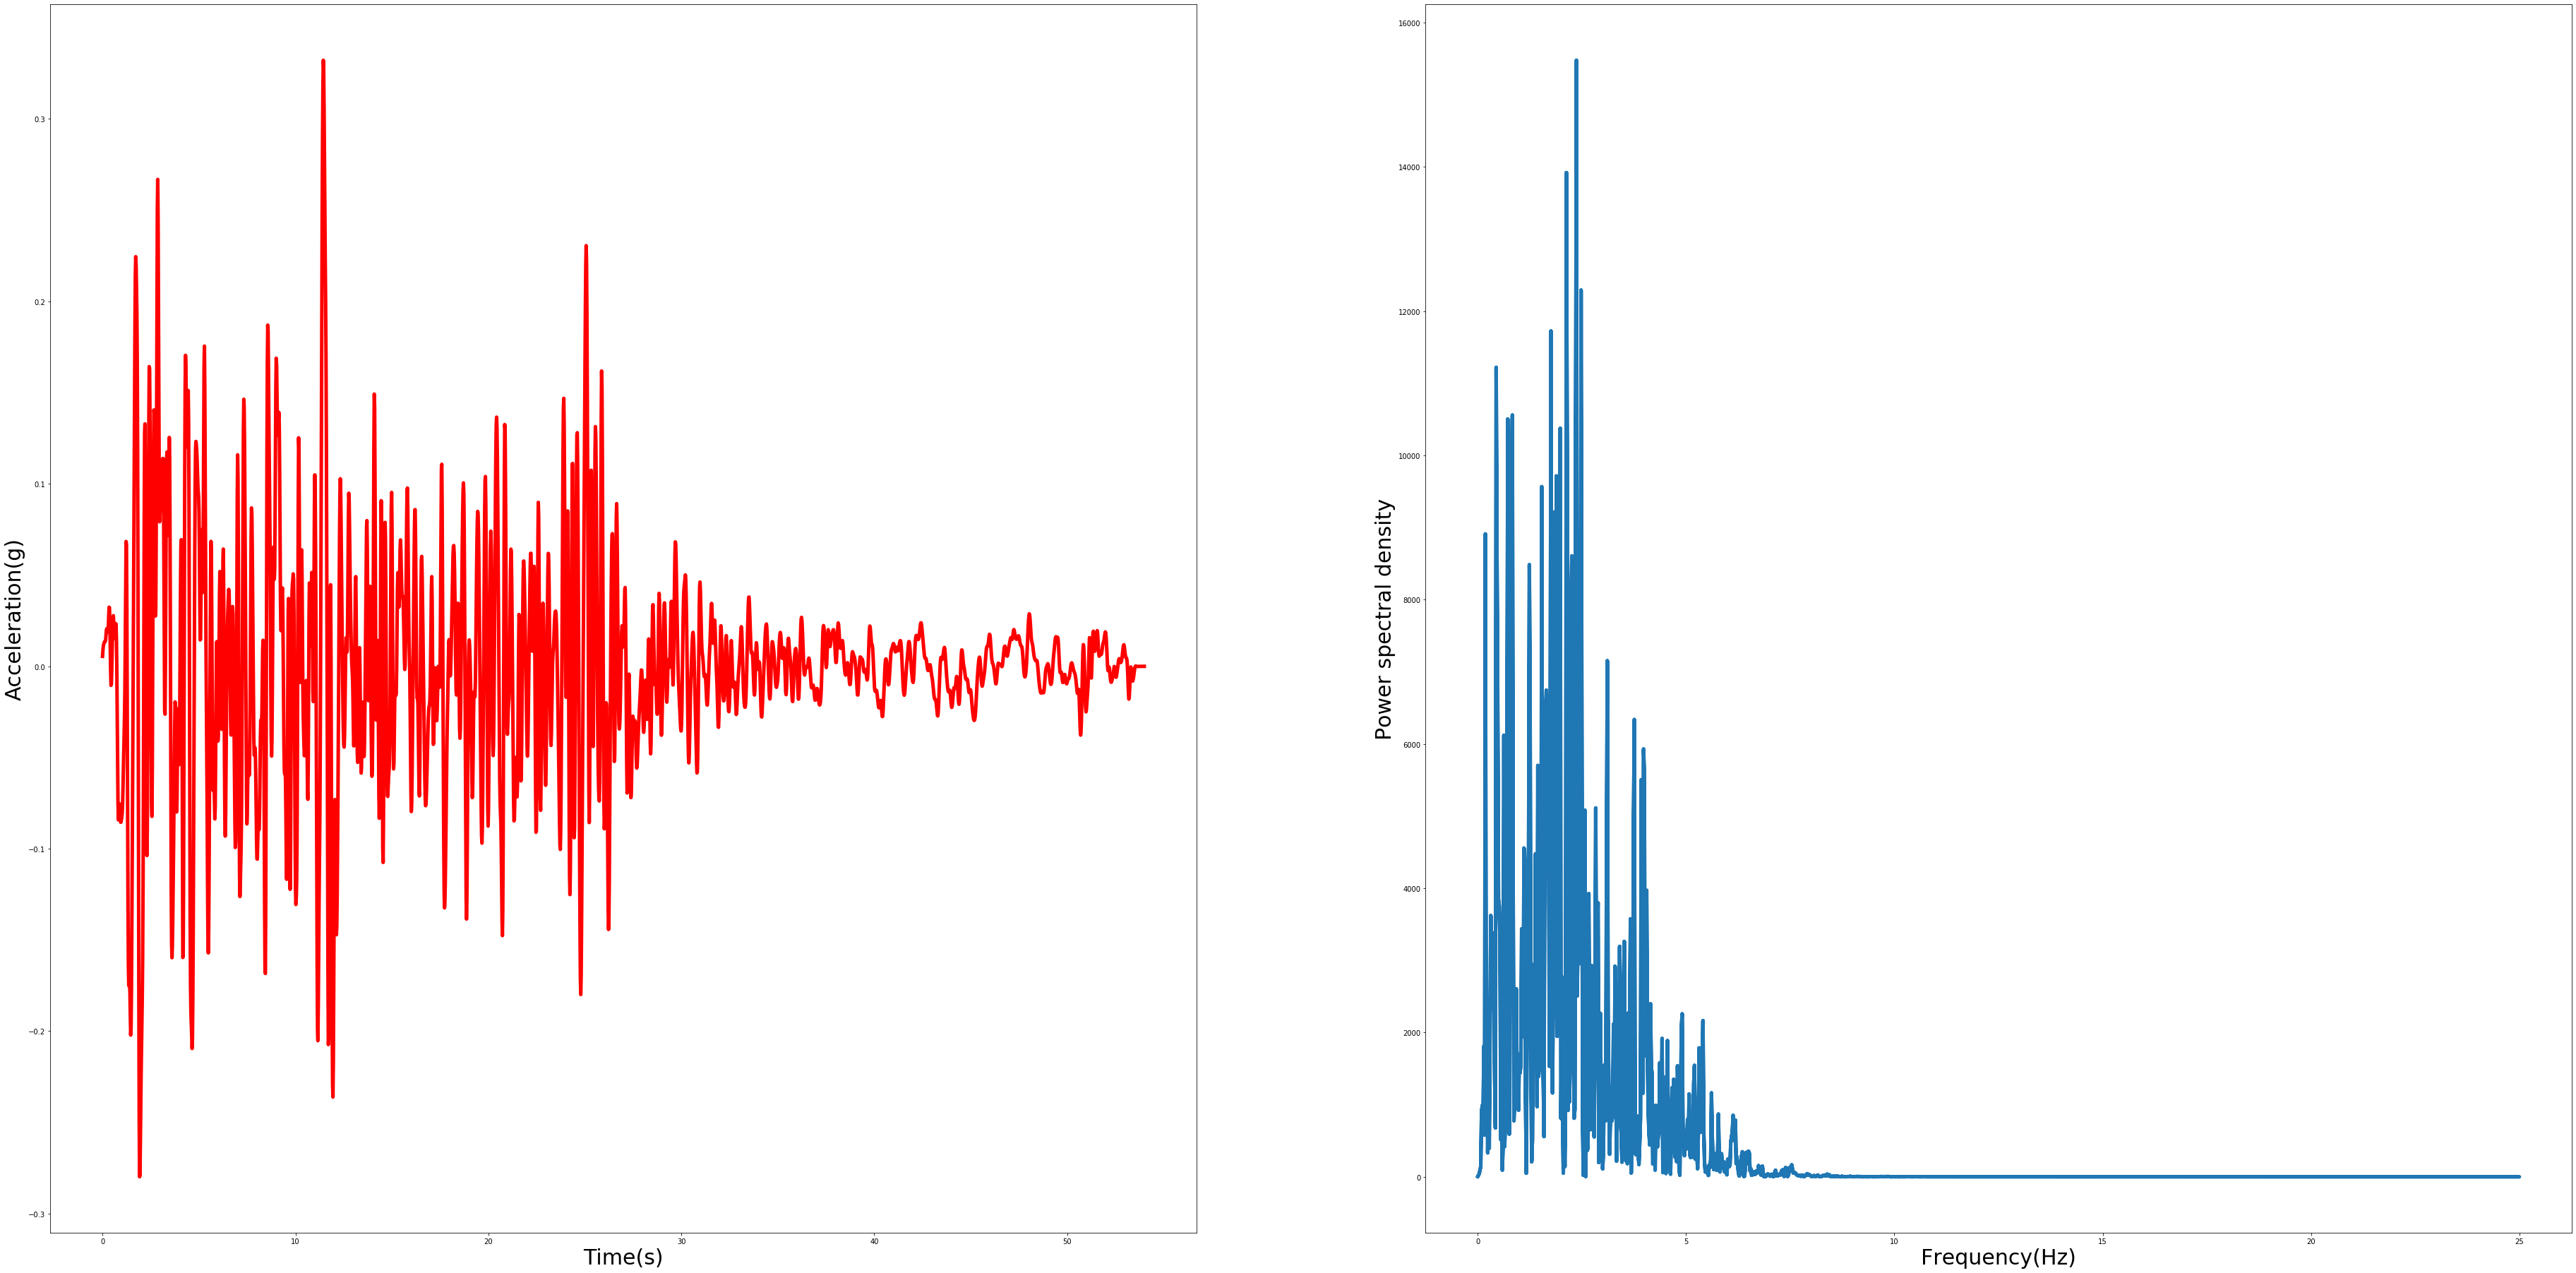

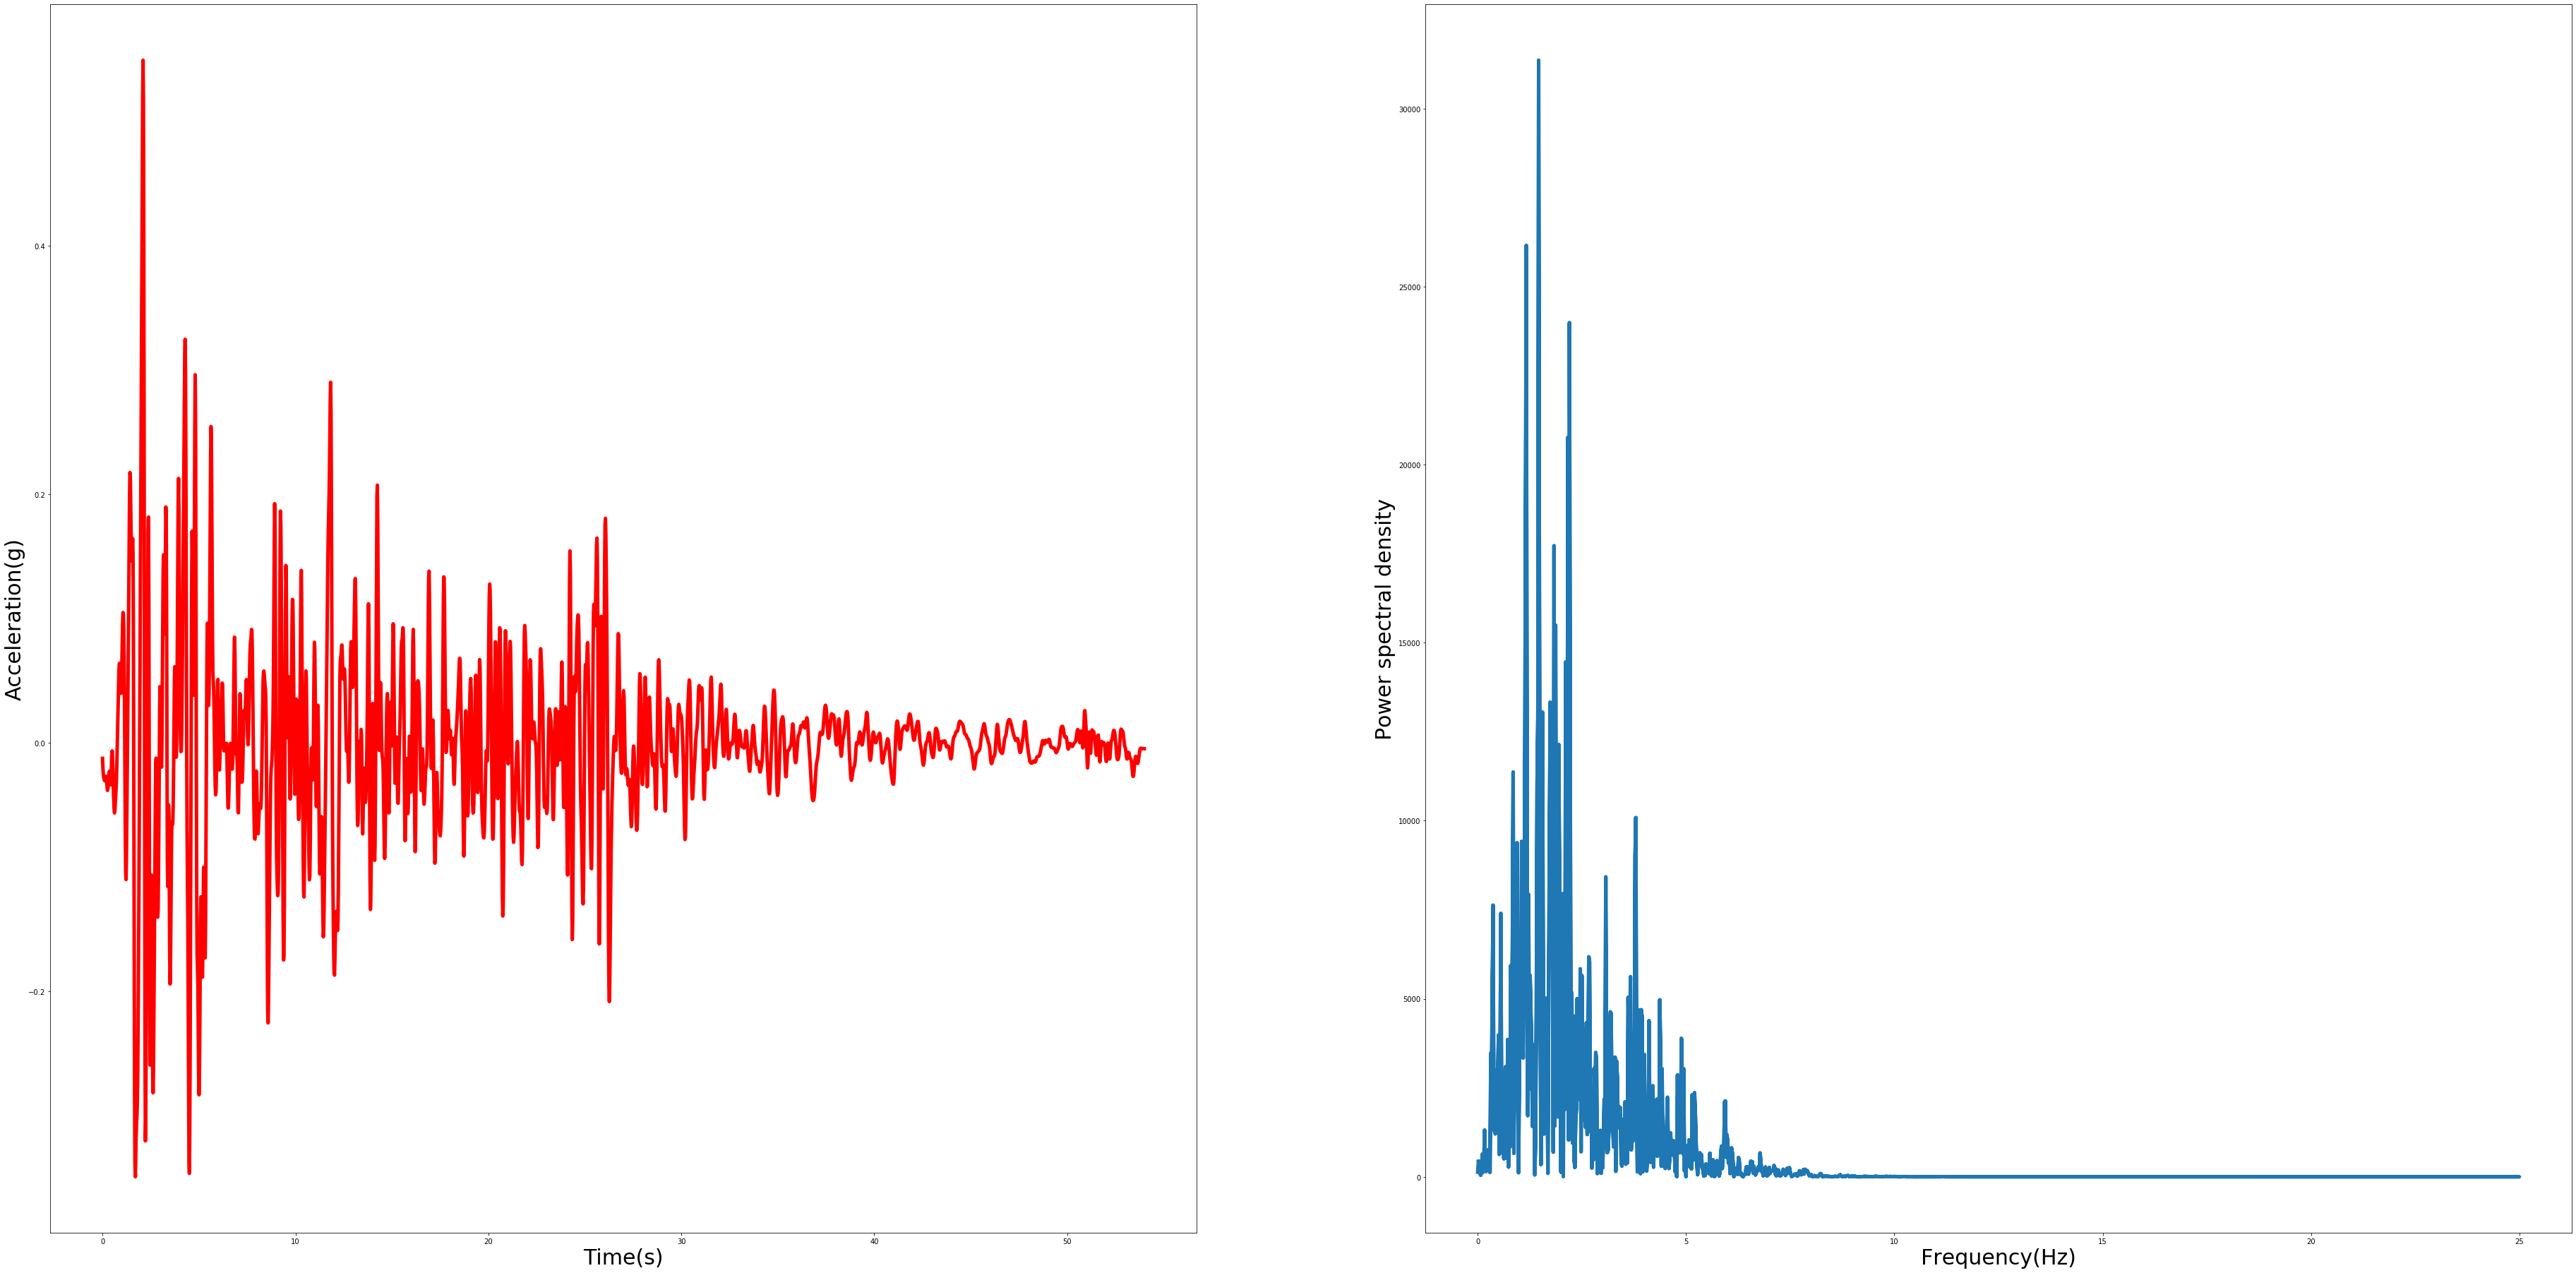

In [10]:
#Seismic waves in the interval 0.03 to 7 Hz
for i in range(3):
    plot_filtered_seismogram(Input[i],0.03,7,0.02,2)

The above wave seems to be quite distributed in the three components, but see that the magnitude in vertical direction is 3 times less than that of horizontal components.So it must be the p wave and we can see that it starts from zero.'

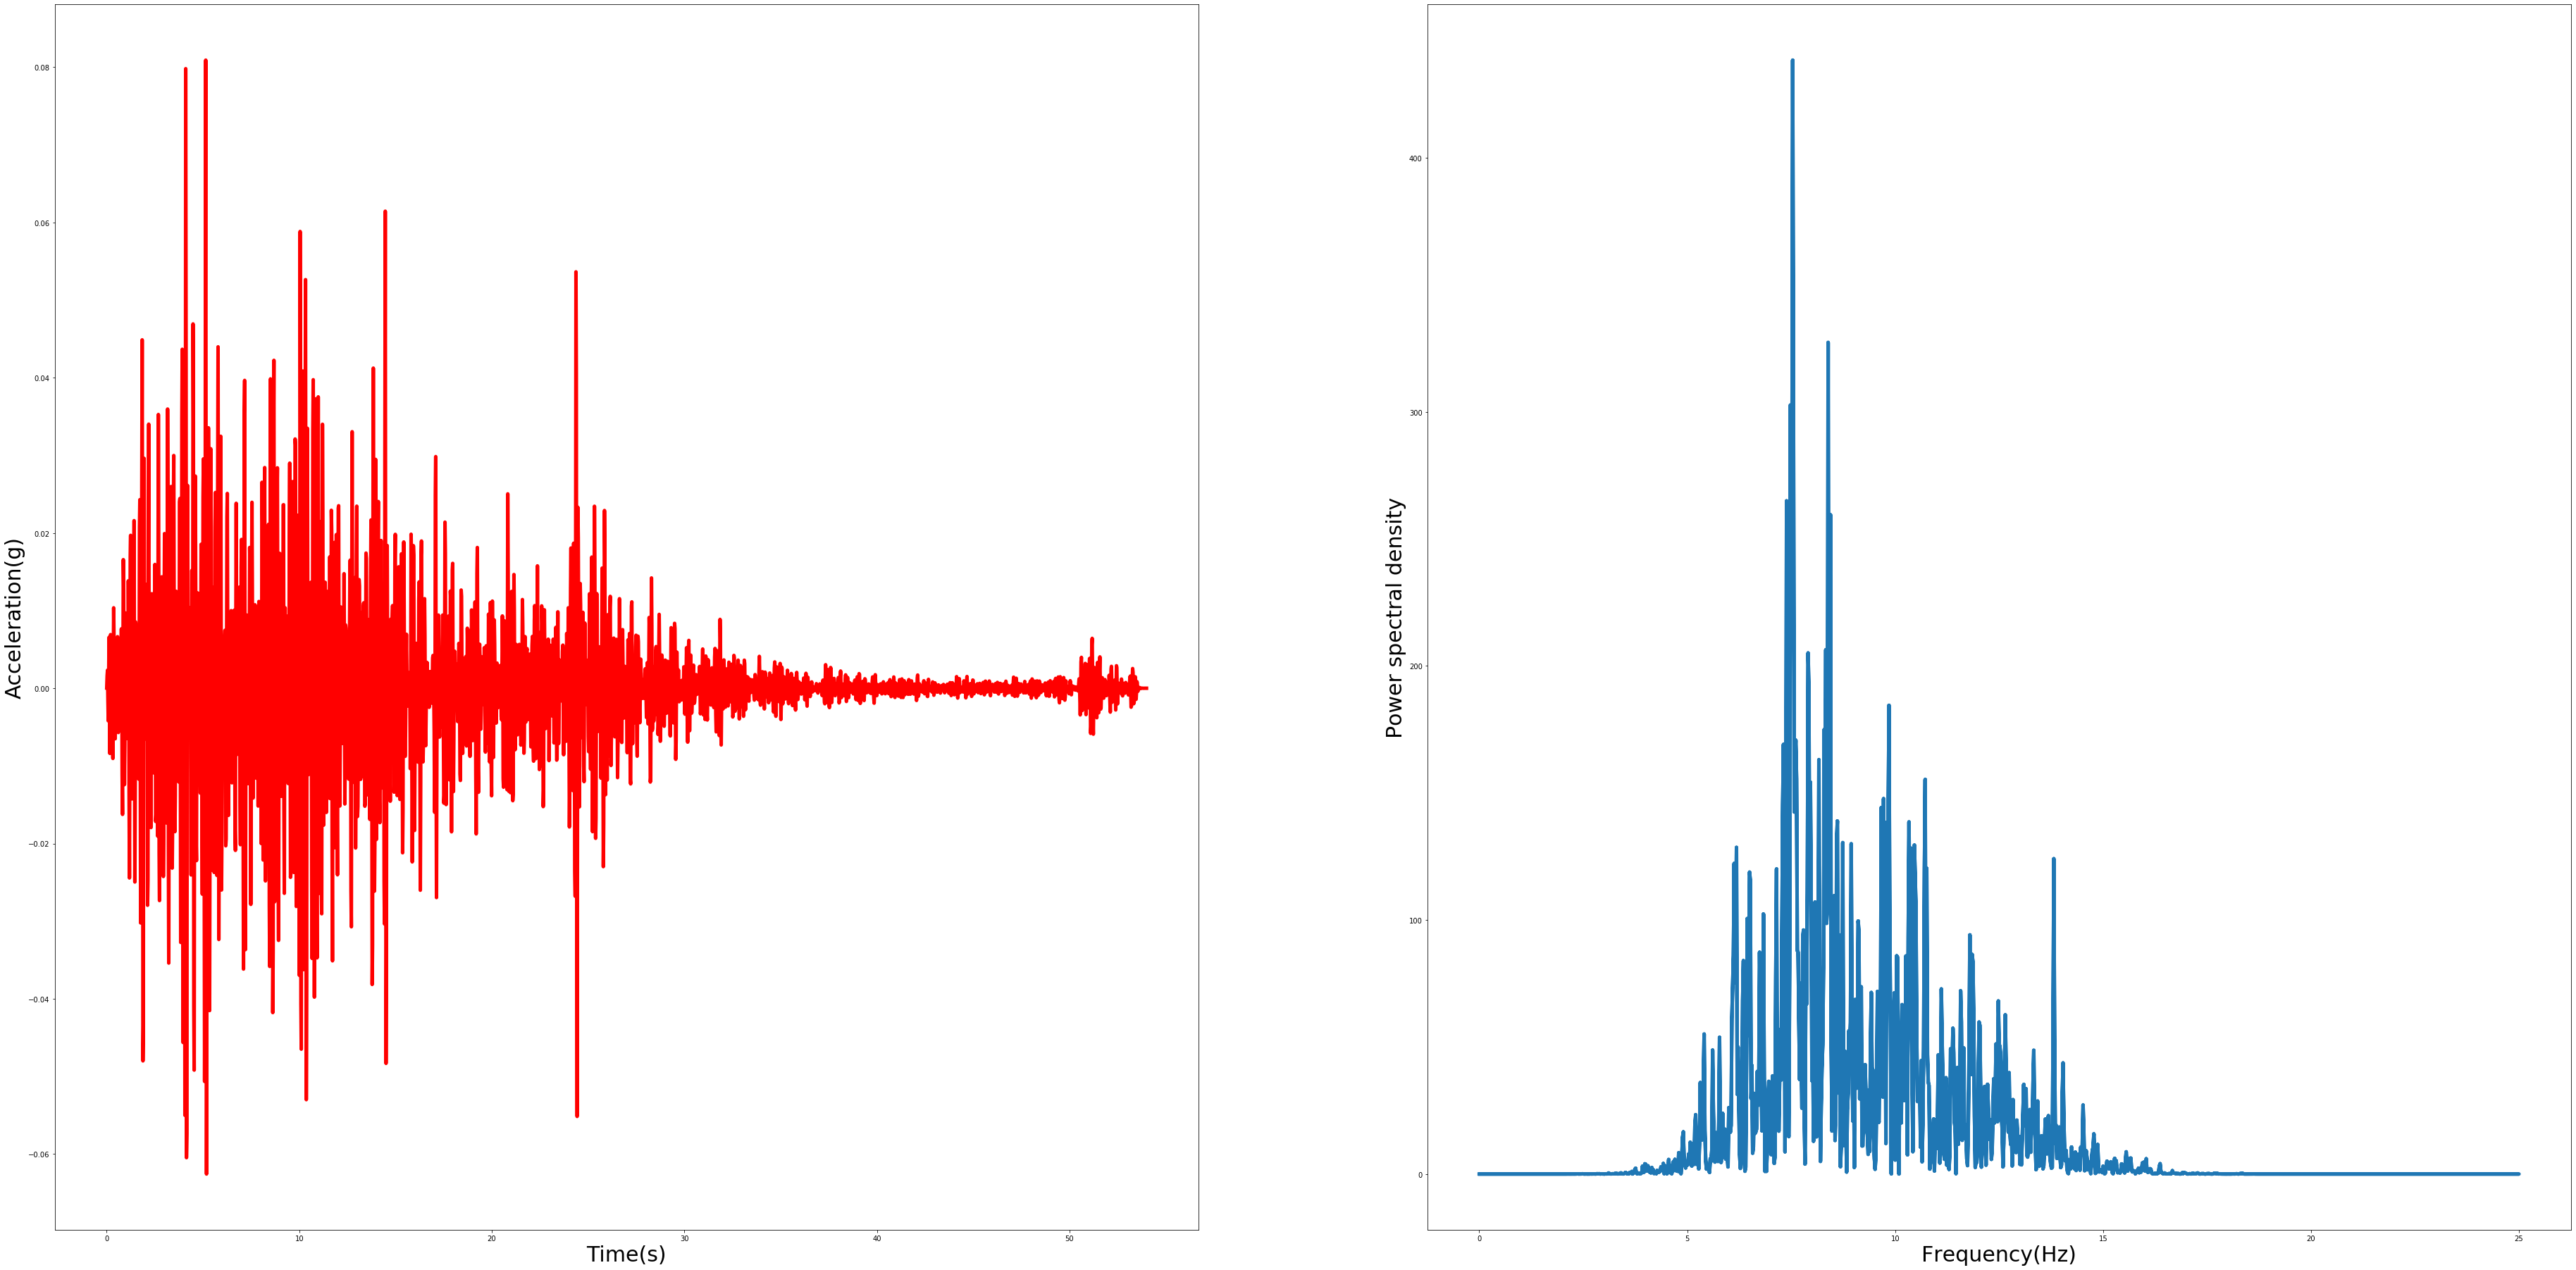

In [11]:
#Seismic waves in the interval 7.02 to 15Hz
for i in range(3):
    plot_filtered_seismogram(Input[i],7.02,15,0.02,2)

In [12]:
#sta/lta algorithm
def sta_lta(data,lta_window,sta_window):
    '''The function returns lta and sta of given datastream'''
    sta=list()
    lta=list()
    k=0
    for i in range(sta_window-1):
        k=k+data[i]**2
        sta.append(k/sta_window)
    k=0
    for i in range(lta_window-1):
        k=k+data[i]**2
        lta.append(k/lta_window)
    t=0
    for i in range(np.size(data)-sta_window+1):
        k=0
        for i in range(t,sta_window+t):
            k=k+data[i]**2
        t=t+1
        sta.append(k/sta_window)
    t=0
    for i in range(np.size(data)-lta_window+1):
        k=0
        for i in range(t,lta_window+t):
            k=k+data[i]**2
        lta.append(k/lta_window)
        t=t+1
    return sta,lta

In [13]:
from obspy.signal.trigger import ar_pick
p=ar_pick(Input[2],Input[1],Input[0], samp_rate=50, f1=0.02, f2=25, lta_p=20, sta_p=1, lta_s=5, sta_s=1, m_p=2 ,m_s=2, l_p=5, l_s=5, s_pick=True)
print(p)

(0.03999999910593033, 6.639999866485596)


In [14]:
#Converting p values to indices 
d=list()
d.append(int(p[0]/0.02)+1)
d.append(int(p[1]/0.02)+1)
print(d)

[2, 332]


In [15]:
def markP_S(data,direction,d,time_limit,interval):
    plt.figure(figsize=(64,32))
    plt.subplot(3,1,direction+1)
    ap_s=list()
    tp_s=list()
    for i in d:
        ap_s.append(data[i])
        tp_s.append(i*interval)
    plt.plot(tp_s,ap_s,'ro')
    t=np.arange(0,time_limit,interval)
    plt.title(Directions[direction],fontsize=60)
    plt.plot(t,data,linewidth='0.3')
    plt.xlabel('Time')
    plt.ylabel('Acceleration')

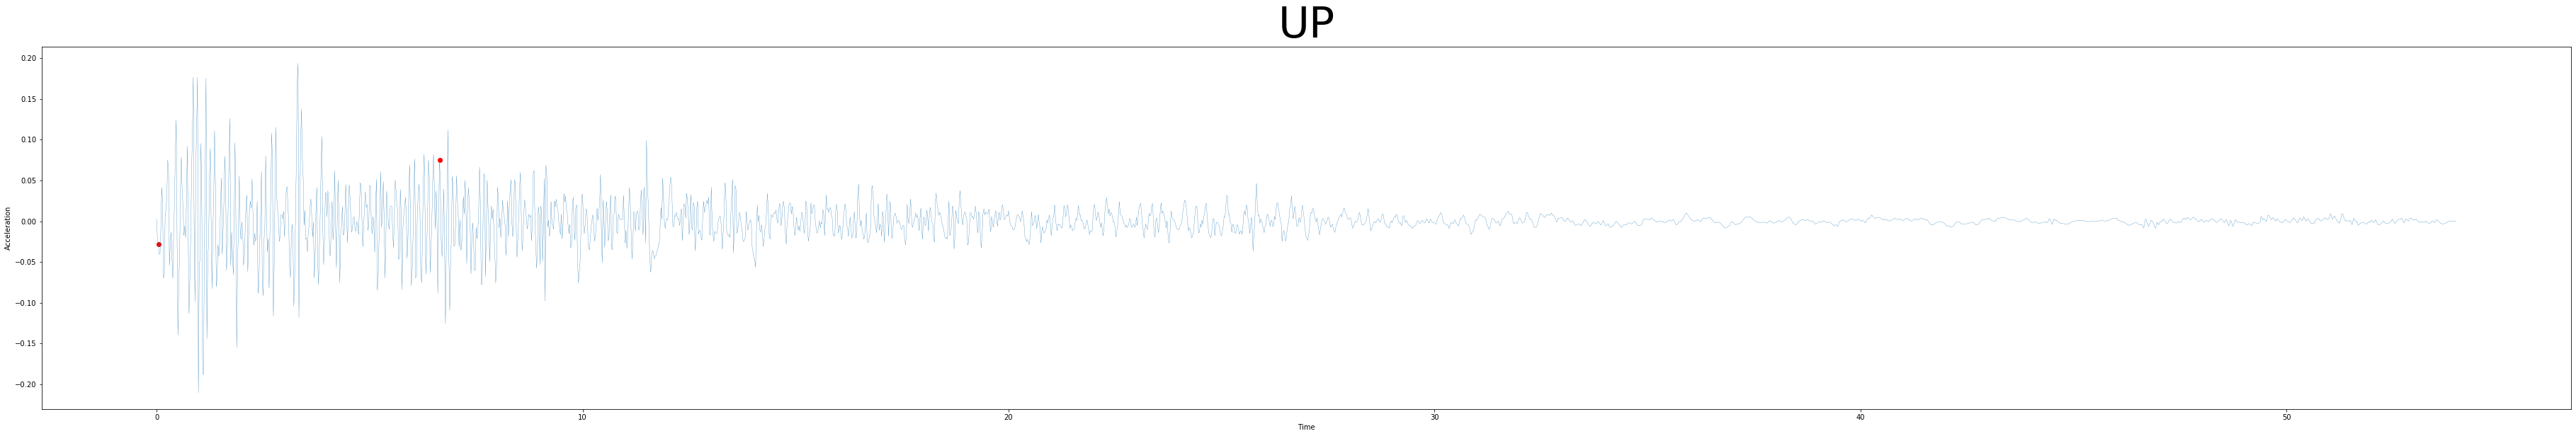

In [16]:
Directions={0:'E-W',1:'N-S',2:'UP'}
for i,j in enumerate(Input):
    markP_S(j,i,d,54,0.02)

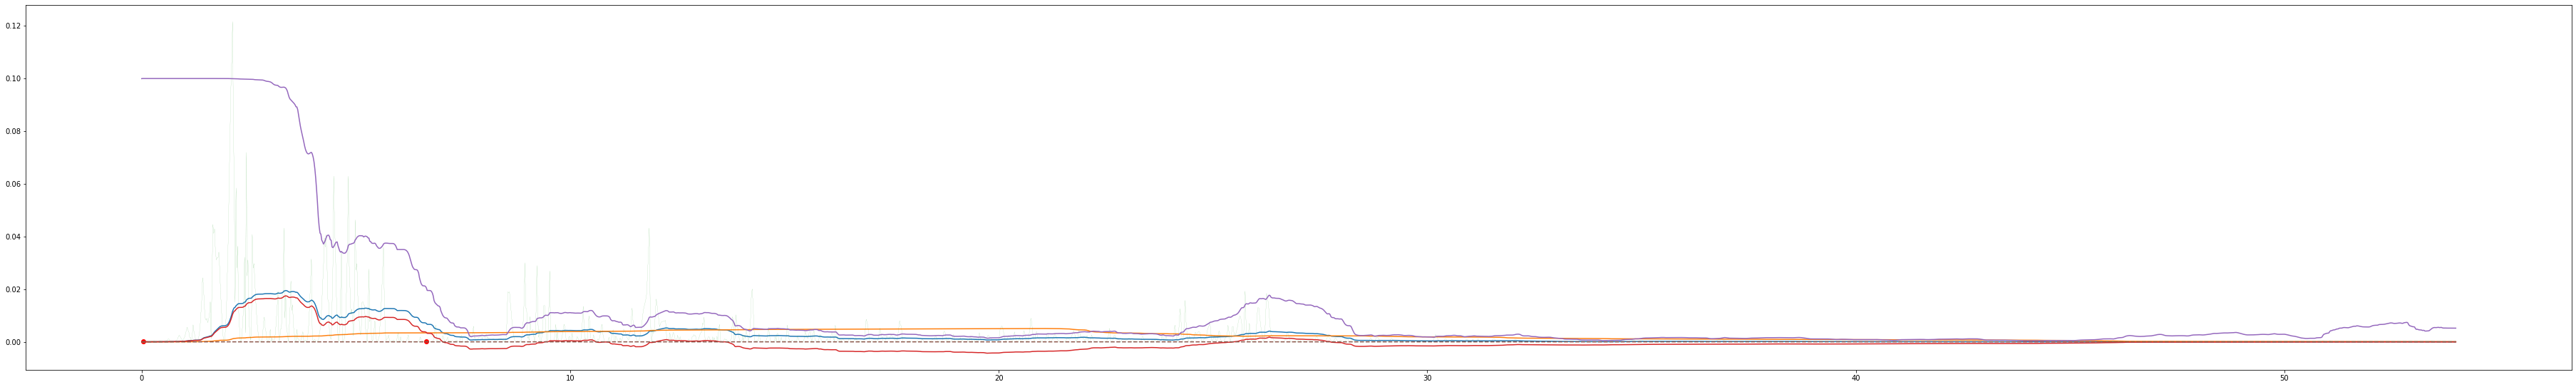

In [17]:
for j,i in enumerate(Input):
    plt.figure(figsize=(64,32))
    plt.subplot(3,1,j+1)
    a,b=sta_lta(i,1000,100)
    ap_s=list()
    tp_s=list()
    for k in d:
        ap_s.append(i[k]*i[k])
        tp_s.append(k*0.02)
    plt.plot(tp_s,ap_s,'ro')
    plt.plot(t,a)
    plt.plot(t,b)
    list1=np.array(i)*np.array(i)
    plt.plot(t,list1,linewidth='0.1')
    plt.plot(t,np.array(a)-np.array(b))
    plt.plot(t,0.01*np.array(a)/(np.array(b)+0.000000000001))
    plt.plot(t,np.zeros_like(t),'--')

One of the criteria for p wave identification is the first increase in sta/lta beyond a threshold.This is also used for separation as applicable.Not apparent here as p wave starts from the very beginning.To check for s wave we generally look at some predefined threshold of sta-lta.Now I'll check s by setting sla-lta as zero and sta-lta =some threshold

In [18]:
print(d)

[2, 332]


In [19]:
for j in Input:
    a,b=sta_lta(j,1000,100)
    for i in range(np.size(a)): 
        if(abs(b[i]-a[i])<abs(b[i])+1e-10):
            print(i)
            break

331
333
266


The result seems to reconcile very well with the available function. The function uses auto regression to select parameters for the comparison.

Now generating data and testing it on the given function. 

For demonstration of the correct calculation of p and s wave my approach to generation of is to concentrate
p wave mainly in horizontal components and s wave mainly in verical component ,I'll be using frequency from 1 to 5 units for p 
wave and 6 to 10 units for s wave.(ps: The frequency will be in some multiple of Hz, As I'll change it while dividing it to make a fitting sine wave.). 

In [20]:
signal_x=list()
signal_y=list()
signal_z=list()
a=np.zeros(shape=(5,1000))
b=np.zeros(shape=(5,1000))
for i in range(5):
    a[i]=np.linspace(0,50*2*(i+1)*np.pi,1000)
    b[i]=np.linspace(0,500*np.pi+100*(i+1)*np.pi,1000)
#plt.plot(np.linspace(0,100*np.pi,1000),np.sin(b[4]/50))

In [21]:
signal_x.append(0.65*np.sin(a[0]/25)+0.65*np.sin(a[1]/25)+0.65*np.sin(a[2]/25)+0.65*np.sin(a[3]/25)+0.65*np.sin(a[4]/25))
signal_y.append(0.65*np.sin(a[0]/25)+0.65*np.sin(a[1]/25)+0.65*np.sin(a[2]/25)+0.65*np.sin(a[3]/25)+0.65*np.sin(a[4]/25))
signal_z.append(0.3*np.sin(a[0]/25)+0.3*np.sin(a[1]/25)+0.3*np.sin(a[2]/25)+0.3*np.sin(a[3]/25)+0.3*np.sin(a[4]/25))

In [22]:
signal_x.append(0.3*np.sin(b[0]/25)+0.3*np.sin(b[1]/25)+0.3*np.sin(b[2]/25)+0.3*np.sin(b[3]/25)+0.3*np.sin(b[4]/25))
signal_y.append(0.3*np.sin(b[0]/25)+0.3*np.sin(b[1]/25)+0.3*np.sin(b[2]/25)+0.3*np.sin(b[3]/25)+0.3*np.sin(b[4]/25))
signal_z.append(0.9*np.sin(b[0]/25)+0.9*np.sin(b[1]/25)+0.9*np.sin(b[2]/25)+0.9*np.sin(b[3]/25)+0.9*np.sin(b[4]/25))

So the generated signal consists of 2000 points, I'll take the sampling rate to be 50. So total duration of the signal is 40 seconds.

In [23]:
signal_x=np.array(signal_x)
signal_y=np.array(signal_y)
signal_z=np.array(signal_z)

In [24]:
#flattening a multi-dimensional array
signal_x=signal_x.ravel()
signal_y=signal_y.ravel()
signal_z=signal_z.ravel()
np.size(signal_x)

2000

In [25]:
p=ar_pick(signal_z,signal_y,signal_x, samp_rate=50, f1=0.02, f2=25, lta_p=20, sta_p=1, lta_s=5, sta_s=1, m_p=2 ,m_s=2, l_p=5, l_s=5, s_pick=True)
print(p)

(15.300000190734863, 19.579999923706055)


In [26]:
#Converting p values to indices 
d=list()
d.append(int(p[0]/0.02)+1)
d.append(int(p[1]/0.02)+1)
print(d)

[766, 979]


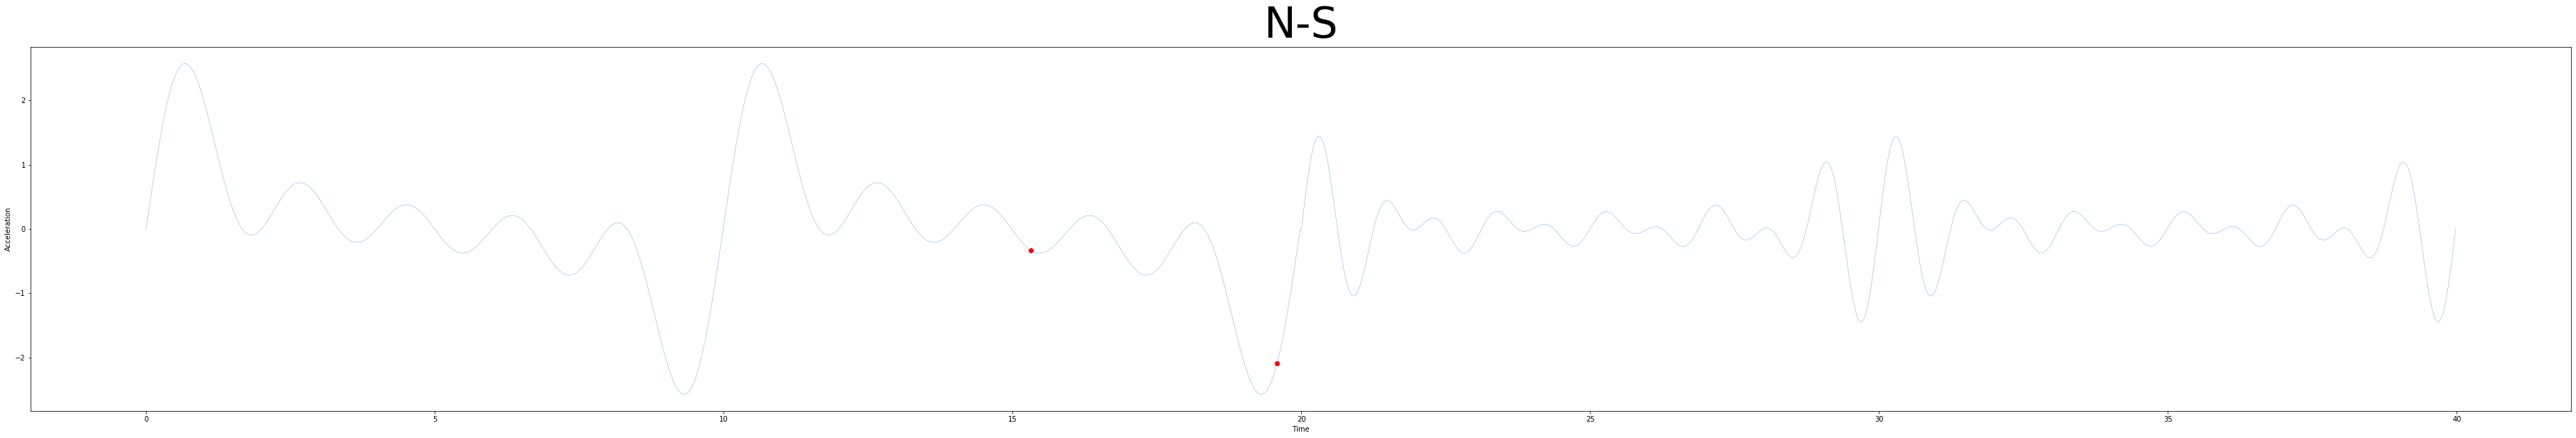

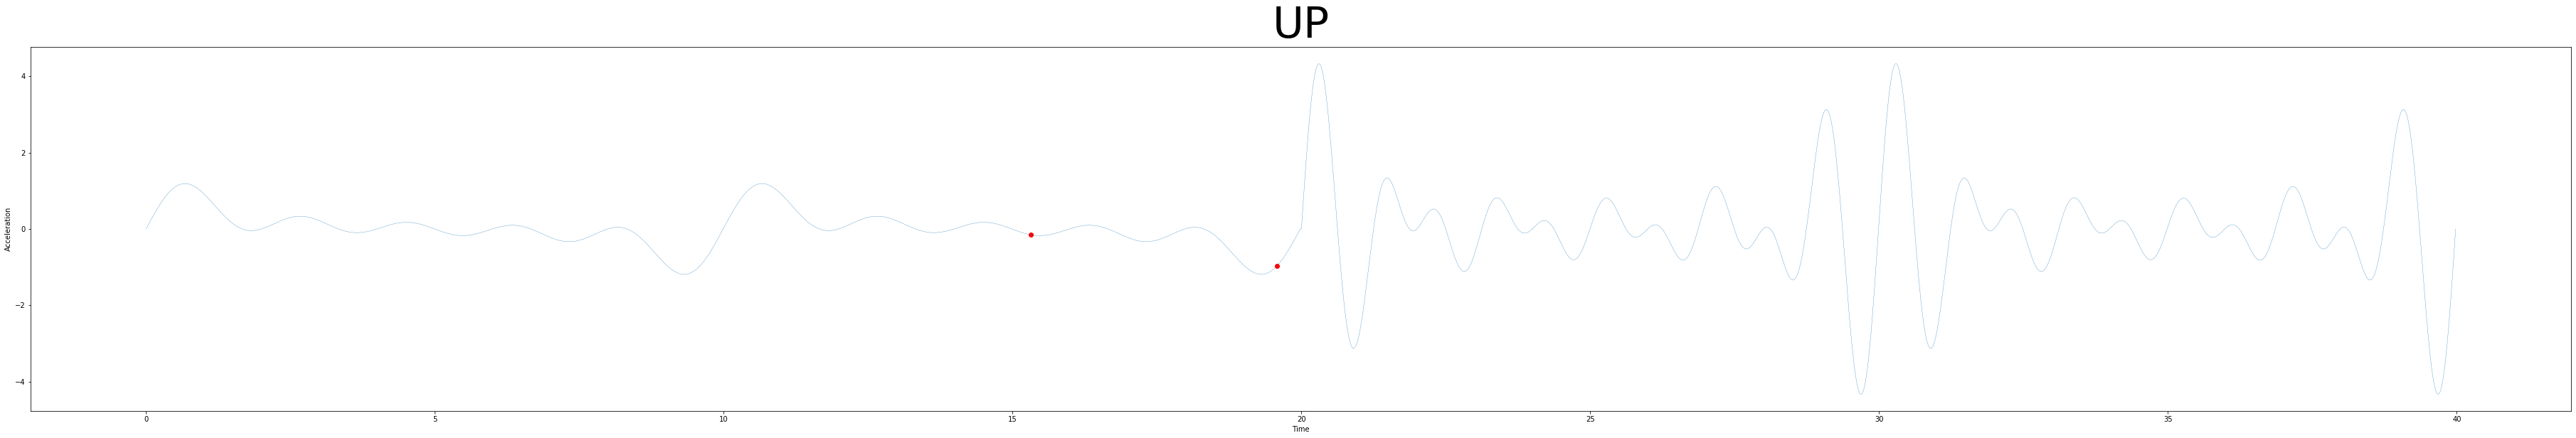

In [27]:
markP_S(signal_x,0,d,40,0.02)
markP_S(signal_y,1,d,40,0.02)
markP_S(signal_z,2,d,40,0.02)

Conclusion:We see that s wave is quite nicely predicted(Expected value=20,obtained value=19.57) by the given function.

p wave cannot be detected most probably cause I chose data which was starting from zero, had a peak just after it,which lowered it's sta/lta initially .

In [28]:
#generating randomnoise in the signal

noise=-2*np.random.random(2000)+2*np.ones(2000)#an array of 2000 random numbers between -2 and 2.

In [29]:
signal_x=noise+signal_x
signal_y=noise+signal_y
signal_z=noise+signal_z

In [30]:
'''Avoiding detrending as it's already done in the function code'''

p=ar_pick(signal_z,signal_y,signal_x, samp_rate=50, f1=0.02, f2=25, lta_p=20, sta_p=1, lta_s=5, sta_s=1, m_p=2 ,m_s=2, l_p=5, l_s=5, s_pick=True)
print(p)

(15.279999732971191, 19.079999923706055)


In [31]:
#Converting p values to indices 
d=list()
d.append(int(p[0]/0.02)+1)
d.append(int(p[1]/0.02)+1)
print(d)

[764, 954]


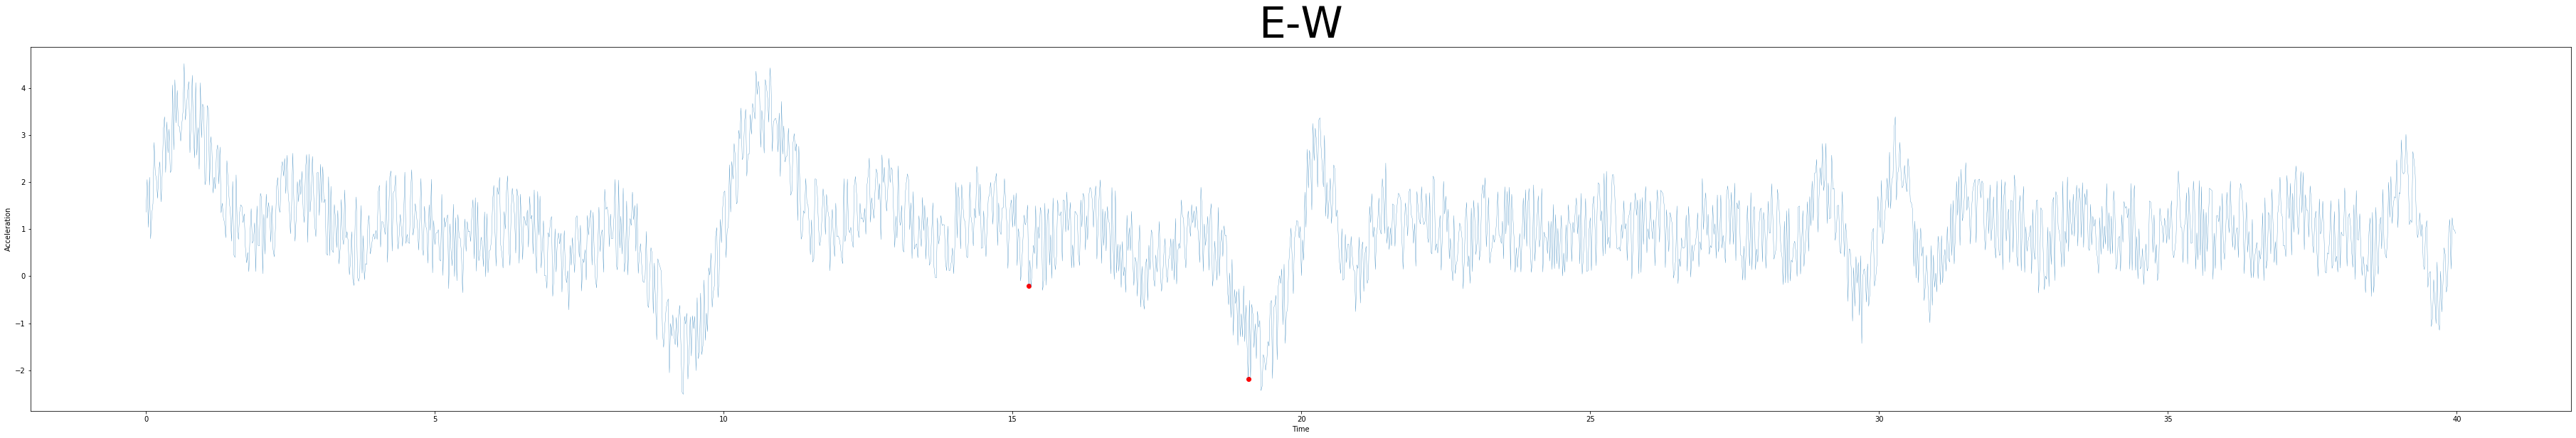

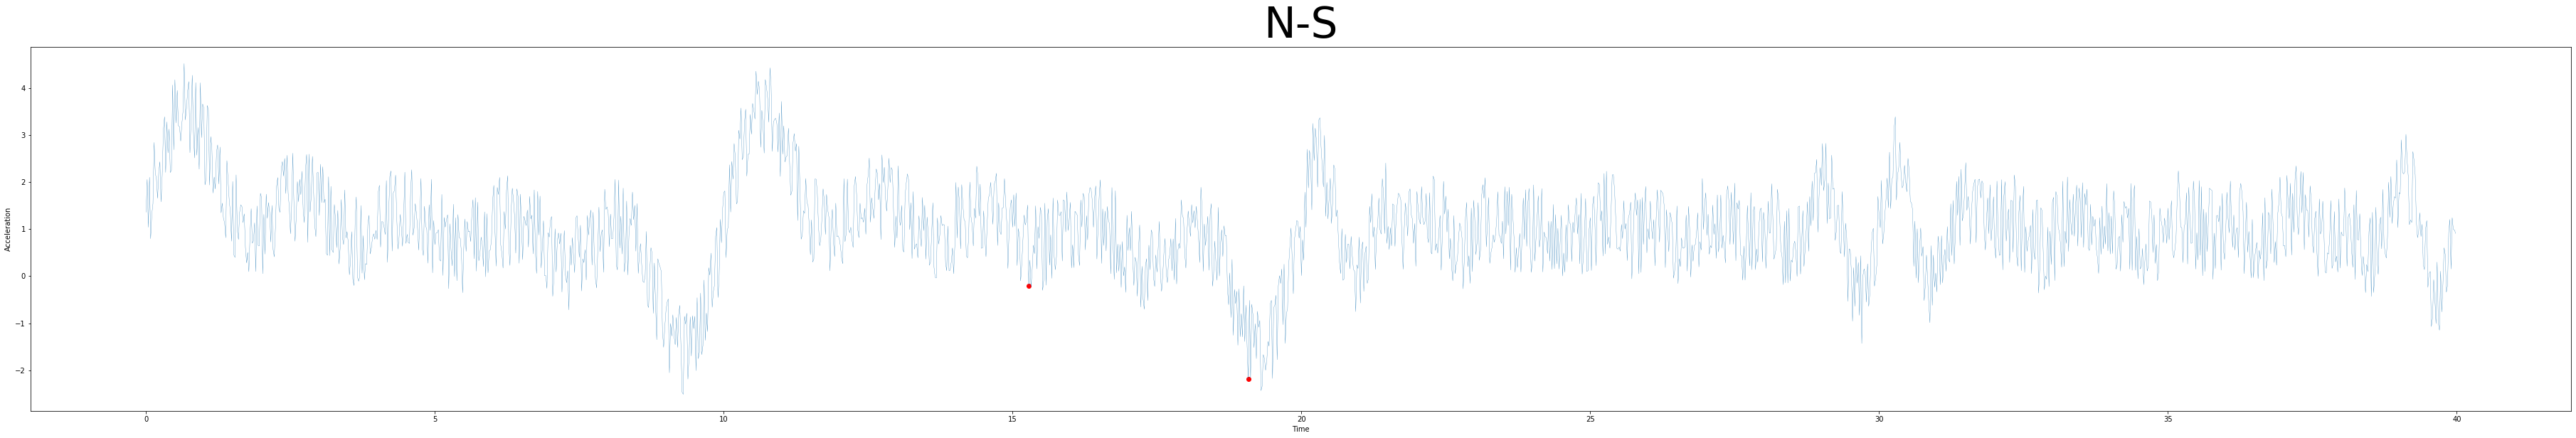

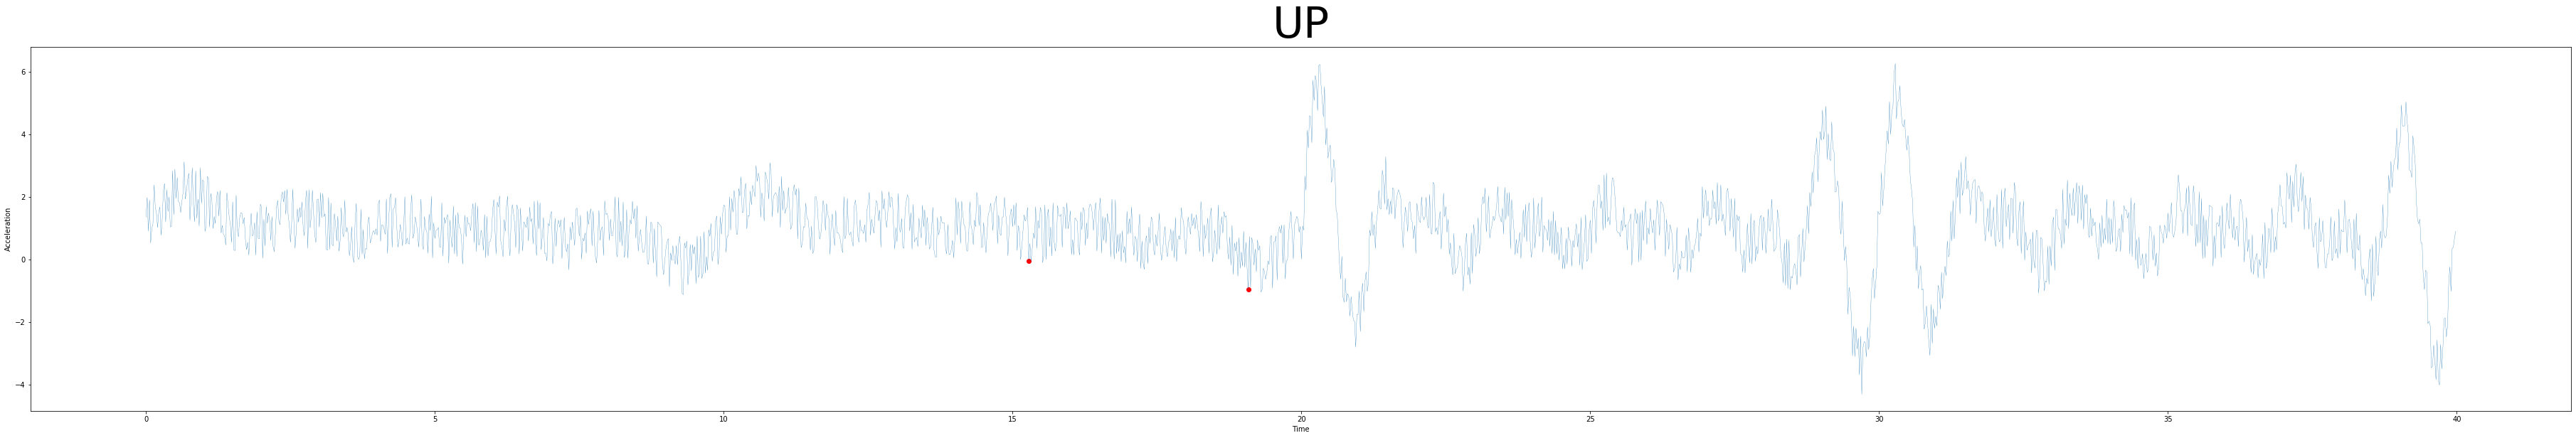

In [32]:
'''Marking p and s wave'''

markP_S(signal_x,0,d,40,0.02)
markP_S(signal_y,1,d,40,0.02)
markP_S(signal_z,2,d,40,0.02)

With added noise the s wave detectes shifts even back further.
These results were discussed. Now to see efficient marking of p wave let us add some plane plane data behind it.

In [33]:
signal_x_new=np.zeros(shape=(3,1000))
signal_y_new=np.zeros(shape=(3,1000))
signal_z_new=np.zeros(shape=(3,1000))


In [34]:
signal_x_new[0]=-1*np.random.random(1000)+np.ones(1000)
signal_y_new[0]=-1*np.random.random(1000)+np.ones(1000)
signal_z_new[0]=-1*np.random.random(1000)+np.ones(1000)

In [35]:
signal_x_new[1]=signal_x[0:1000:1]
signal_y_new[1]=signal_y[0:1000:1]
signal_z_new[1]=signal_z[0:1000:1]
signal_x_new[2]=signal_x[1000:2000:1]
signal_y_new[2]=signal_y[1000:2000:1]
signal_z_new[2]=signal_z[1000:2000:1]

In [36]:
signal_x_new=signal_x_new.ravel()
signal_y_new=signal_y_new.ravel()
signal_z_new=signal_z_new.ravel()

In [37]:
p=ar_pick(signal_z_new,signal_y_new,signal_x_new, samp_rate=50, f1=0.02, f2=25, lta_p=20, sta_p=1, lta_s=5, sta_s=1, m_p=2 ,m_s=2, l_p=5, l_s=5, s_pick=True)
print(p)

(15.760000228881836, 29.520000457763672)


In [38]:
#Converting p values to indices 
d=list()
d.append(int(p[0]/0.02)+1)
d.append(int(p[1]/0.02)+1)
print(d)

[789, 1477]


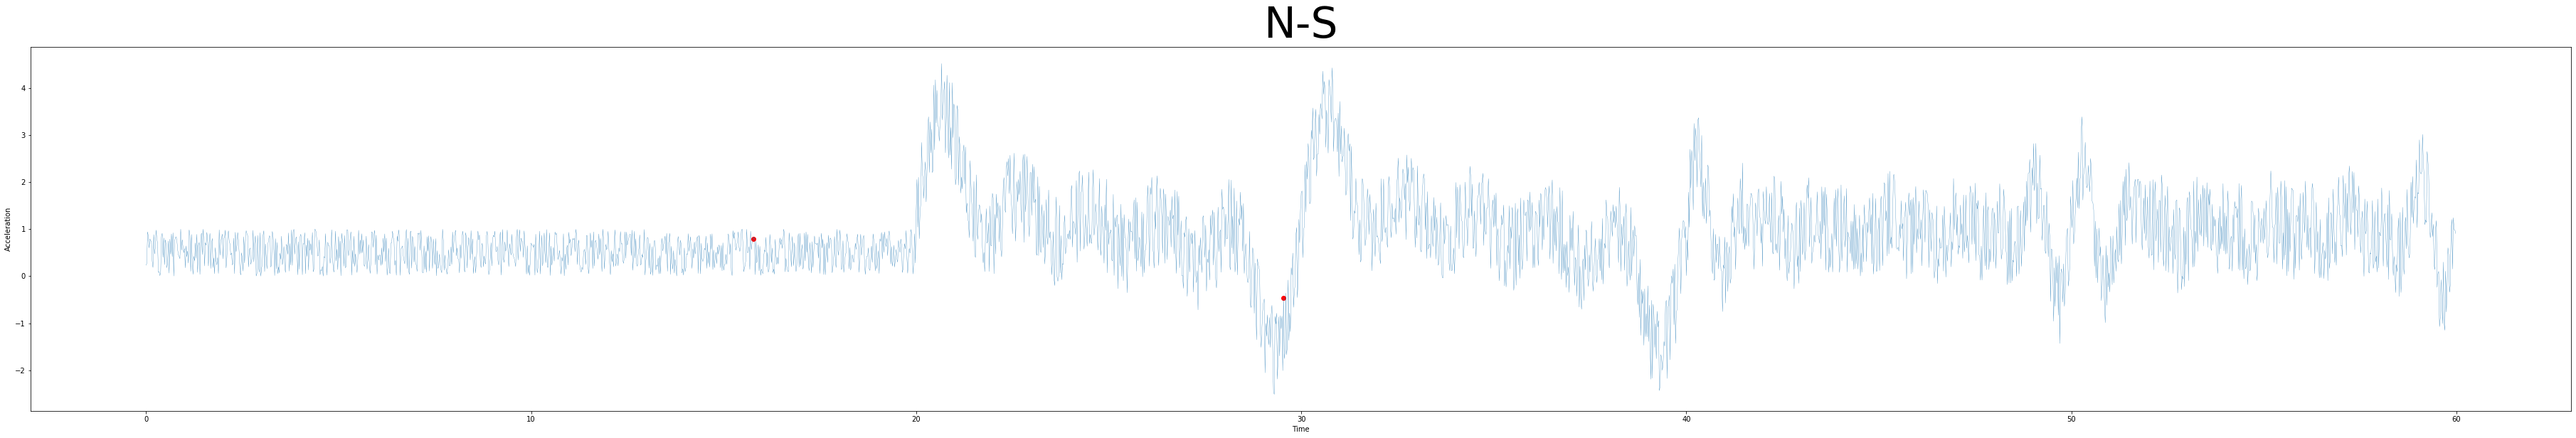

In [39]:
'''Marking p and s wave'''

markP_S(signal_x_new,0,d,60,0.02)
markP_S(signal_y_new,1,d,60,0.02)
markP_S(signal_z_new,2,d,60,0.02)

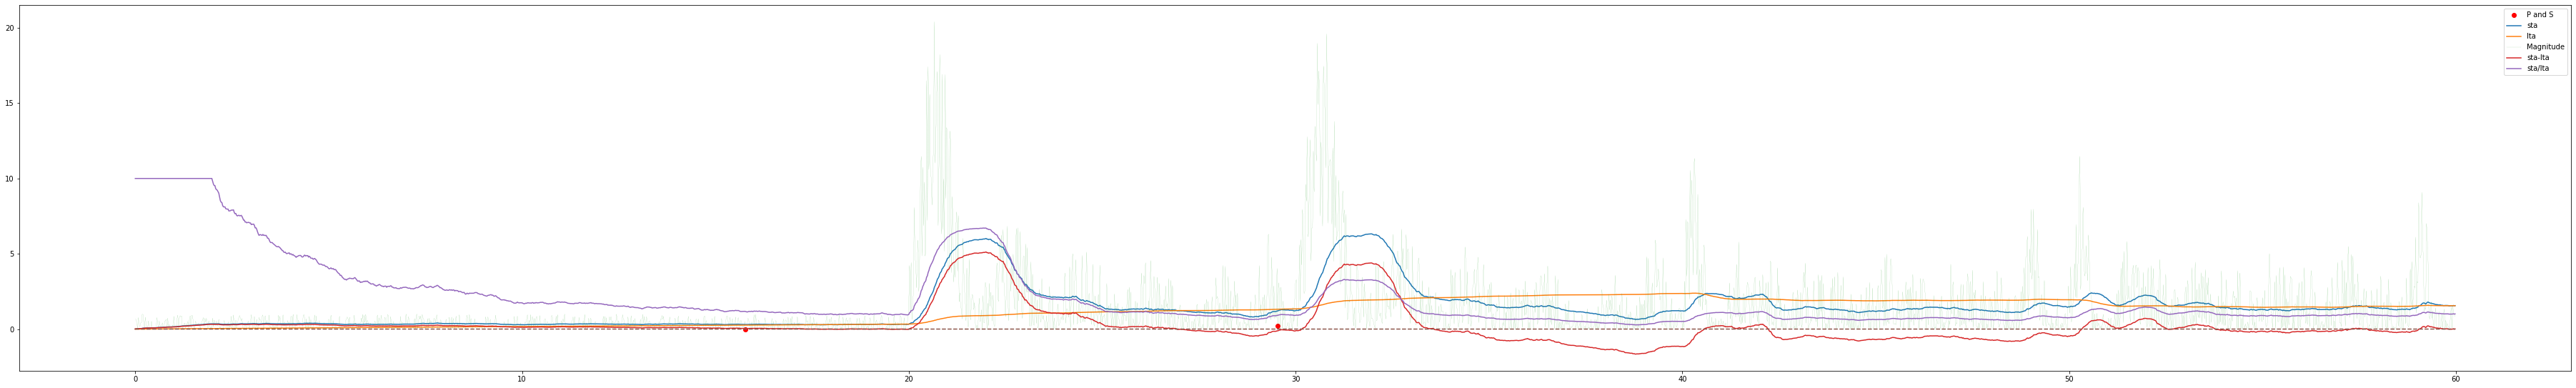

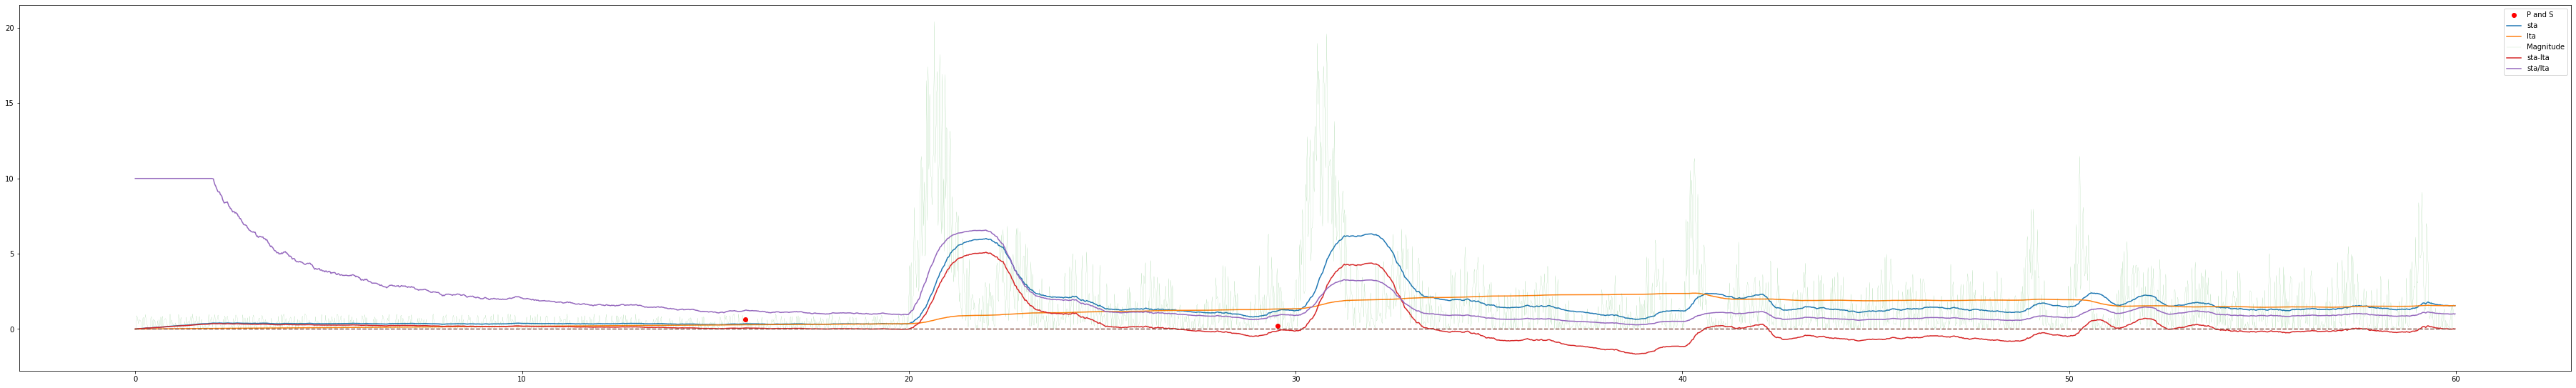

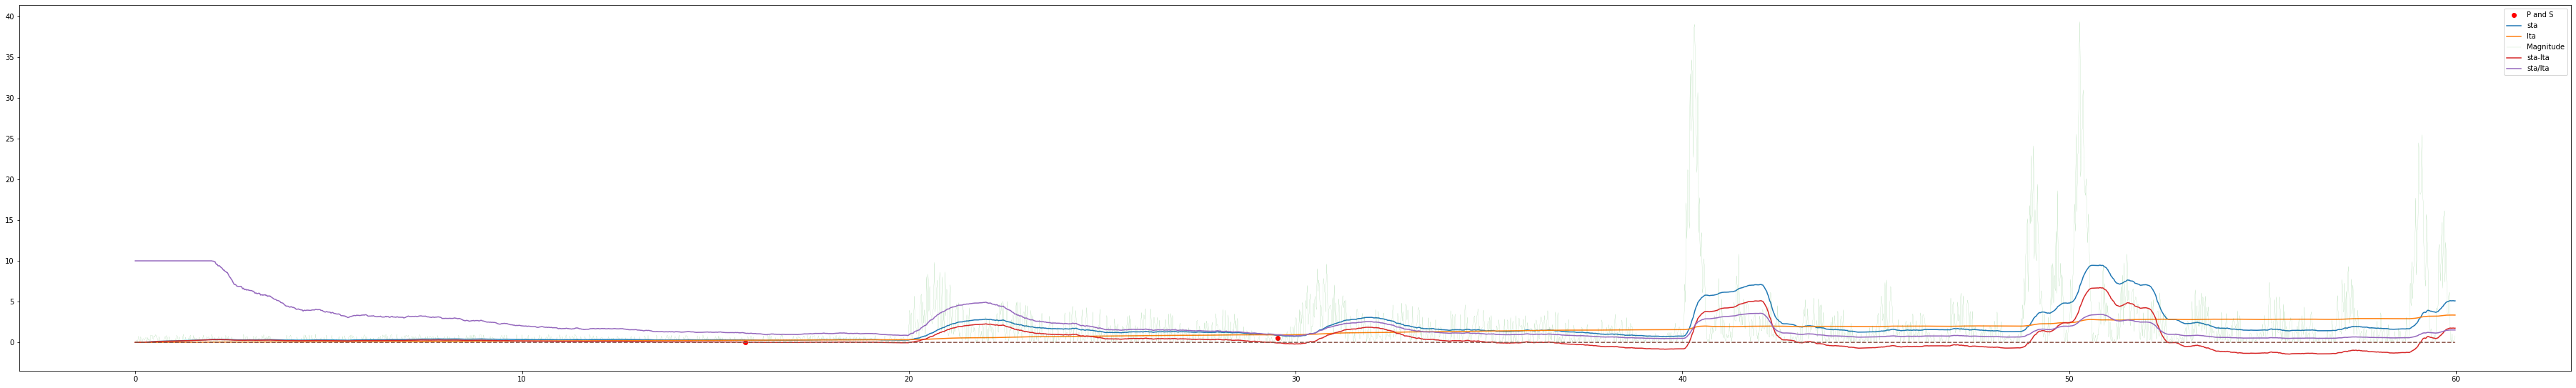

In [40]:
t=np.arange(0,60,0.02)

Input=list()

Input.append(signal_x_new)

Input.append(signal_y_new)

Input.append(signal_z_new)

for j,i in enumerate(Input):
    
    plt.figure(figsize=(64,32))
    
    plt.subplot(3,1,j+1)
    
    a,b=sta_lta(i,1000,100)
    
    ap_s=list()
    
    tp_s=list()
    
    for k in d:
        ap_s.append(i[k]*i[k])
        tp_s.append(k*0.02)
    
    plot1,=plt.plot(tp_s,ap_s,'ro')
    plot1.set_label('P and S')
    
    plot2,=plt.plot(t,a)
    plot2.set_label('sta')
    
    plot3,=plt.plot(t,b)
    plot3.set_label('lta')
    
    list1=np.array(i)*np.array(i)
    
    plot4,=plt.plot(t,list1,linewidth='0.1')
    plot4.set_label('Magnitude')
    
    plot5,=plt.plot(t,np.array(a)-np.array(b))
    plot5.set_label('sta-lta')
    
    plot6,=plt.plot(t,np.array(a)/(np.array(b)+0.000000000001))
    plot6.set_label('sta/lta')
    
    plt.plot(t,np.zeros_like(t),'--')#just  to make x axis visible
    plt.legend()

Just a sharp observation in this case and the previous one would reveal that sta-lta is nearly equal to zero for p as well as s wave.The p wave is marked well before actual p wave.

An additional oservation the value of p and s arrival changes with window length.We need to work out proper window length so that our results may be correct.